In [2]:
import os, sys

sys.path.append(os.path.abspath("../"))

num_i = 2
num_a = 2
num_o = 2

In [3]:
from qiskit import QuantumCircuit, QuantumRegister

import rustworkx
from rustworkx.visualization import graphviz_draw
from rustworkx.rustworkx import simple_cycles
import collections
from collections import Counter
import copy


In [4]:
from helperfunctions.reversecircuitgraph import uncompute_input_nodes_greedy, add_uncomp_input_node, uncomp_all_operations_using_bennetts_in_circuitgraph
from helperfunctions.circuitgraphfunctions import get_computation_graph, get_uncomp_circuit
from helperfunctions.graphhelper import breakdown_qubit, edge_attr, node_attr
from helperfunctions.uncompfunctions import add_uncomputation, add_uncomputation_step

from helperfunctions.constants import StringConstants, ListConstants

In [5]:
INPUT = StringConstants.INPUT.value
ANCILLA = StringConstants.ANCILLA.value
OUTPUT = StringConstants.OUTPUT.value

INIT = StringConstants.INIT.value
COMP = StringConstants.COMP.value
UNCOMP = StringConstants.UNCOMP.value

TARGET = StringConstants.TARGET.value
CONTROL = StringConstants.CONTROL.value
ANTIDEP = StringConstants.ANTIDEP.value

NON_QFREE = ListConstants.NON_QFREE.value

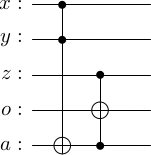

In [6]:
circ = QuantumCircuit(QuantumRegister(1, 'x'), QuantumRegister(1, 'y'), QuantumRegister(1, 'z'),  QuantumRegister(1, 'o'), QuantumRegister(1, 'a'),)
circ.ccx(0,1,4)
circ.ccx(2,4,3)

circ.draw('latex')

Adding Nodes for Circuit: 100%|██████████| 2/2 [00:00<00:00, 7584.64it/s]


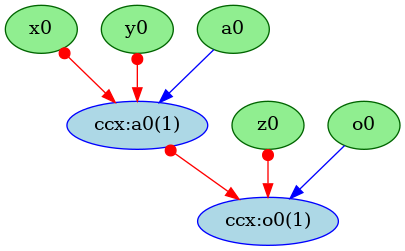

In [7]:
cg = get_computation_graph(circ, ancillas=['a0'], outputs=['o0'])

graphviz_draw(cg, node_attr, edge_attr)

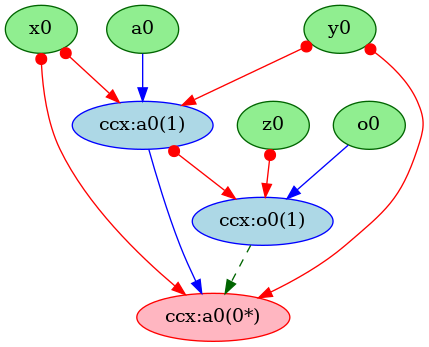

In [8]:
ucg = uncomp_all_operations_using_bennetts_in_circuitgraph(cg)

graphviz_draw(ucg, node_attr, edge_attr)

Building uncomp circuit from circuit graph: 100%|██████████| 8/8 [00:00<00:00, 53687.09it/s]


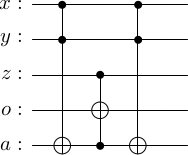

In [9]:
ucirc = get_uncomp_circuit(ucg)
ucirc.draw('latex')

In [10]:
from helperfunctions.randomcircuit import random_quantum_circuit_varied_percentages

circ, n, a ,g = random_quantum_circuit_varied_percentages(5,3,10,False, False, False, 0.6,0.2,0.1,0.1)

Building Random Quantum Circuit with 5q, 3a, 10g: 100%|██████████| 10/10 [00:00<00:00, 13243.78it/s]


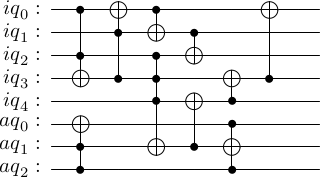

In [11]:
circ.draw('latex')

In [12]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy
import matplotlib.patches as mpatches

fig_legend = plt.figure(figsize=(11, 0.3))
labels = ['Bennett\'s', 'Reduced']
colors = [mcolors.CSS4_COLORS['red'],
        mcolors.CSS4_COLORS['darkorange'],]
patches = [mpatches.Patch(color=color, label=label) 
           for label, color in zip(labels, colors)]

fig_legend.legend(patches, labels, loc='center',
                    ncol=5, mode="expand", borderaxespad=0, 
                    frameon=False)
# fig_legend.tight_layout()
fig_legend.savefig(os.path.abspath('../qsw_paper_images/Legend.png'))

<Figure size 1100x30 with 0 Axes>